In [1]:
import os
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# Figure for DNP enhencement
# data directory : enhencament 1H cdse 408 nm folder 211 /201   13Cd  cdse 350 folder  
## Cd 408 nm DP-315 CP -314 
# cdse 350nm DP cp
# Cd T1
# Cd Buildup curve
# two different CP time  CdSe350 folder 67 68
# CP time array folder 224 


In [2]:
bas_dir=os.path.dirname('/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Yunyao')
path1_list = ['Yunyao','314','pdata','1']
data_path1 = os.path.join(bas_dir, *path1_list)
path2_list = ['Yunyao','315','pdata','1']
data_path2 = os.path.join(bas_dir, *path2_list)
path3_list = ['Yunyao','320','pdata','1']
data_path3 = os.path.join(bas_dir, *path3_list)
path4_list = ['Yunyao','330','pdata','1']
data_path4 = os.path.join(bas_dir, *path4_list)
path1_raw =['Yunyao','314']
data_path_raw1= os.path.join(bas_dir, *path1_raw)
#print(data_path)

In [3]:
dic, data1=ng.bruker.read_pdata(data_path1)
dic, data2=ng.bruker.read_pdata(data_path2)
dic, data3=ng.bruker.read_pdata(data_path3)
dic, data4=ng.bruker.read_pdata(data_path4)
udic=ng.bruker.guess_udic(dic,data1)
uc=ng.fileiobase.uc_from_udic(udic)
ppm=uc.ppm_scale()

In [4]:
dic, data1_raw=ng.bruker.read(data_path_raw1)
#dic, data2=ng.bruker.read_pdata(data_path2)
udic=ng.bruker.guess_udic(dic,data1)
uc=ng.fileiobase.uc_from_udic(udic)
ppm=uc.ppm_scale()

In [5]:
# #process the first half reversed echo
# em_data2=ng.process.proc_base.em(data1_raw[0:512], lb=0.005, inv=False, rev=False)
# zero_fill2=ng.process.proc_base.zf(em_data2, pad=512, mid=False)
# postcorr_frq2 = ng.proc_base.fft(zero_fill2)
# #intearctive phase
# ng.process.proc_autophase.manual_ps(postcorr_frq2,notebook=True)
# #write the correct phase to spectrum
# #phased_data2 = ng.proc_base.ps(postcorr_frq2, p0=-72, p1=0)

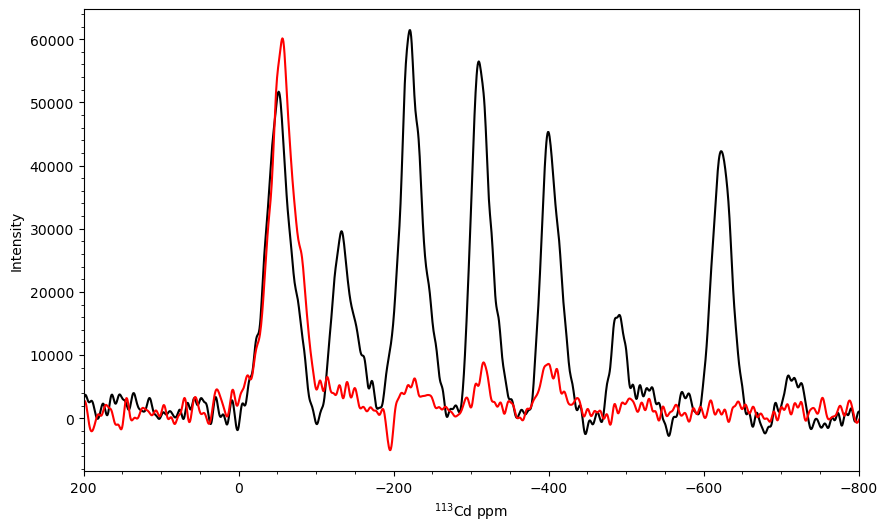

In [7]:
fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(ppm,data1,'k-')
ax.plot(ppm,data2,'r-')

ax.set_xlabel('$^{113}$Cd ppm')
ax.set_ylabel("Intensity")
ax.minorticks_on()  # Enable minor ticks on both x and y axes
#ax.set_title("Top Values from Each Group")
ax.set_xlim(200, -800)
#plt.legend()
#plt.grid(True)
plt.show()
fig.savefig('QD2.8_HCdCP_DP_8kmas.pdf')

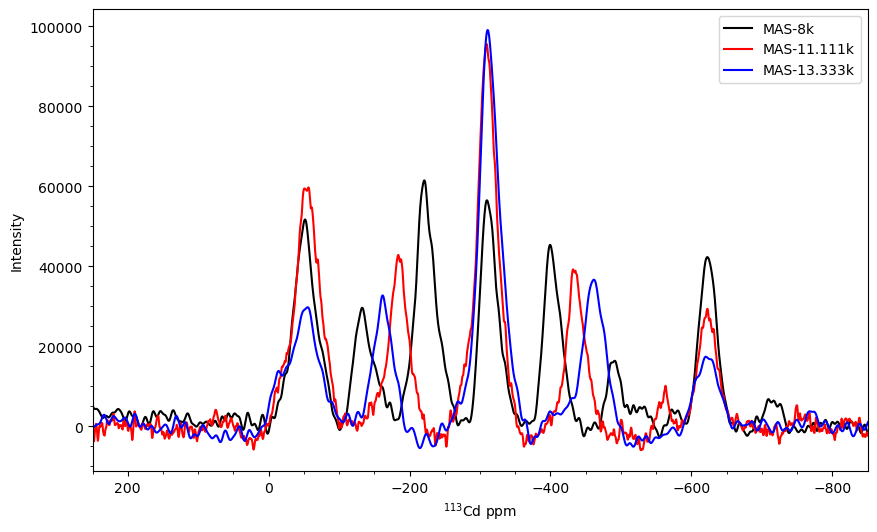

In [9]:
#plot all CdSeQD2.8 spectra
#CP -314 (4k SCANS) dP-315 (4k SCANS, 13.333khz)
# CP -320 (4k SCANS, 11.111k) 
# CP -330 (4kSCANS, 13.333khz)

fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(ppm,data1,'k-',label='MAS-8k')
ax.plot(ppm,data3,'r-',label='MAS-11.111k')
ax.plot(ppm,data4,'b-',label='MAS-13.333k')
#ax.plot(ppm,data4,'g-')

ax.set_xlabel('$^{113}$Cd ppm')
ax.set_ylabel("Intensity")
ax.minorticks_on()  # Enable minor ticks on both x and y axes
#ax.set_title("Top Values from Each Group")
ax.set_xlim(250, -850)
plt.legend()
#plt.grid(True)
plt.show()
fig.savefig('QD2.8_HCdCP_DP_*kmas.pdf')

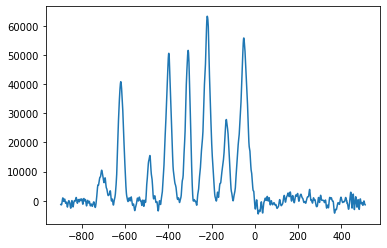

In [34]:
#prepare files for simpson simulations
np=udic[0]['size']
sw=int(udic[0]['sw'])
ref=udic[0]['car']/udic[0]['obs']
with open ('CdSe408_8kmas_HCdCP.spe','w+') as file:
    file.write('SIMP\n')
    file.write('NP={}\n'.format(np))
    file.write('SW={}\n'.format(sw))
    file.write('#Ref={}\n'.format(ref))
    file.write('TYPE=SPE\n')
    file.write('DATA\n')
               
# wirte the data part
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(ppm,data1)
df=pd.DataFrame(data1.size*[0],data1[::-1]-ref)
df.to_csv('./CdSe408_8kmas_HCdCP.spe',sep=' ',mode='a',header=False)
               

In [45]:
import numpy as np
QDCSA=np.array([127.9,260, 213])
QDiso=np.array([-50.7,-312,-618])+193.76
QDCSA_hz=QDCSA*udic[0]['obs']
QDiso_hz=QDiso*udic[0]['obs']
print(QDCSA_hz)
print(QDiso_hz)

[11366.35143879 23105.95288574 18929.1075564 ]
[ 12713.60623013 -10507.87642004 -37701.80558557]


In [66]:
ref=udic[0]['car']/udic[0]['obs']
print(ref)
udic

-193.76087992447444


{'ndim': 1,
 0: {'sw': 125000,
  'complex': True,
  'obs': 88.8690495605469,
  'car': -17219.345240903294,
  'size': 2048,
  'label': '113Cd',
  'encoding': 'direct',
  'time': True,
  'freq': False}}

In [71]:
iso=np.array([-52.22, -314, -623.8])-ref
print(iso)

[ 141.54087992 -120.23912008 -430.03912008]


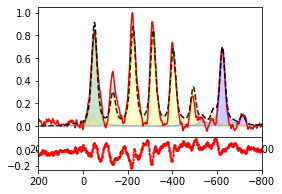

In [121]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test1.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test2.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test3.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

data1=data1/data1.max() #normalized experimental data

scale=[data1[uc(-52.22,'ppm')], data1[uc(-314,'ppm')],data1[uc(-623.8,'ppm')]]

SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

syn_spec=np.array(df3.real*scale[2]+df1.real*scale[0]+df2.real*scale[1]) # combine all components

diff=array1 = syn_spec-np.array(data1[::-1])

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)


ax1.plot(ppm, data1, "r-")
ax1.plot(x_axis, syn_spec, 'k--')

ax2.plot(x_axis,diff, 'ro', markersize=1 )

# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak 1
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 1
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

ax1.set_xlim([200,-800])
ax2.set_xlim([200,-800])

fig.savefig('QD2.8_HCdCP_8KMASP_fitting.pdf')


In [92]:
#calculate the residue spectrum and rms
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1 = np.array(df3.real*scale[2]+df1.real*scale[0]+df2.real*scale[1])
array2 = np.array(data1[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")


Root Mean Square (RMS): 0.06


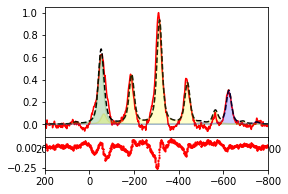

In [113]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test111.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test112.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test113.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

data3=data3/data3.max() #normalized experimental data

scale=[data3[uc(-52.22,'ppm')], data3[uc(-314,'ppm')],data3[uc(-623.8,'ppm')]]

SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

syn_spec=np.array(df3.real*scale[2]+df1.real*scale[0]+df2.real*scale[1]) # combine all components

diff=array1 = syn_spec-np.array(data3[::-1])

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)


ax1.plot(ppm, data3, "r-")
ax1.plot(x_axis, syn_spec, 'k--')

ax2.plot(x_axis,diff, 'ro', markersize=1 )

# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak 1
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 1
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

ax1.set_xlim([200,-800])
ax2.set_xlim([200,-800])

fig.savefig('QD2.8_HCdCP_11p111KMASP_fitting.pdf')

In [114]:
#calculate the residue spectrum and rms
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1 = syn_spec
array2 = np.array(data3[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")

Root Mean Square (RMS): 0.05


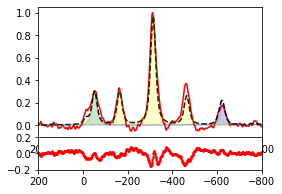

In [118]:
from matplotlib import gridspec
# use simulated simpson files to reconstruct the experimental spectrum
df1=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test131.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df2=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test132.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')
df3=pd.read_csv('/Users/yunyao_1/Dropbox/CdSe-data-owen/data_processing_scripts/simpson_opt/CdSeQD/CdSe_QD_test133.spe', skiprows=5, skipfooter=1, index_col=False,sep=' ',header=None,names=['real','image'],engine='python')

df1.real=df1.real-df1.real.min()  #baseline correction
df1.real=df1.real/df1.real.max()  #normalization

df2.real=df2.real-df2.real.min()  #baseline correction
df2.real=df2.real/df2.real.max()  #normalization

df3.real=df3.real-df3.real.min()  #baseline correction
df3.real=df3.real/df3.real.max()  #normalization

data4=data4/data4.max() #normalized experimental data

scale=[data4[uc(-52.22,'ppm')], data4[uc(-314,'ppm')],data4[uc(-623.8,'ppm')]]

SW =125000
ref_ppm = -193.76087992447444
NP=2048
nuclus_freq= udic[0]['obs']
span_ppm = SW/nuclus_freq
start_x= ref_ppm-span_ppm/2
end_x= ref_ppm + span_ppm/2

syn_spec=np.array(df3.real*scale[2]+df1.real*scale[0]+df2.real*scale[1]) # combine all components

diff=array1 = syn_spec-np.array(data4[::-1])

x_axis =np.linspace(start_x, end_x, num= NP, endpoint=True)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(2,1,height_ratios=[1,0.25] )
ax1 = fig.add_subplot(gs[0])
ax2  =fig.add_subplot(gs[1])
gs.update(hspace=0)


ax1.plot(ppm, data4, "r-")
ax1.plot(x_axis, syn_spec, 'k--')

ax2.plot(x_axis,diff, 'ro', markersize=1 )

# peak 1
ax1.plot(x_axis,df1.real*scale[0], "g",alpha=0.2)
ax1.fill_between(x_axis, (df1.real*scale[0]).min(), df1.real*scale[0], facecolor="green", alpha=0.2)

# peak 1
ax1.plot(x_axis,df2.real*scale[1], "y",alpha=0.2)
ax1.fill_between(x_axis, (df2.real*scale[1]).min(), df2.real*scale[1], facecolor="yellow", alpha=0.2)

# peak 1
ax1.plot(x_axis,df3.real*scale[2], "b",alpha=0.2)
ax1.fill_between(x_axis, (df3.real*scale[2]).min(), df3.real*scale[2], facecolor="blue", alpha=0.2)

ax1.set_xlim([200,-800])
ax2.set_xlim([200,-800])
ax2.set_ylim([-0.2,0.2])

fig.savefig('QD2.8_HCdCP_13p333KMASP_fitting.pdf')

In [116]:
import numpy as np

def calculate_rms(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")
    
    squared_diff = (array1 - array2)**2
    mean_squared_diff = np.mean(squared_diff)
    rms = np.sqrt(mean_squared_diff)
    return rms

# Example usage
array1 = syn_spec
array2 = np.array(data4[::-1])

rms_value = calculate_rms(array1, array2)
print(f"Root Mean Square (RMS): {rms_value:.2f}")

Root Mean Square (RMS): 0.04


In [43]:
#carbon cdse 408  off 202  on 212
bas_dir=os.path.dirname('/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Yunyao')
path1_list = ['Yunyao','212','pdata','1']
data_path1 = os.path.join(bas_dir, *path1_list)
path2_list = ['Yunyao','202','pdata','1']
data_path2 = os.path.join(bas_dir, *path2_list)
#print(data_path)

In [44]:
dic, data1=ng.bruker.read_pdata(data_path1)
dic, data2=ng.bruker.read_pdata(data_path2)
udic=ng.bruker.guess_udic(dic,data1)
uc=ng.fileiobase.uc_from_udic(udic)
ppm=uc.ppm_scale()

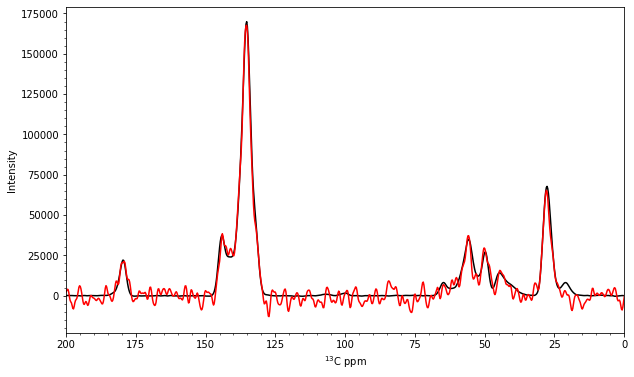

In [49]:
fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(ppm,data1,'k-')
ax.plot(ppm,data2*50,'r-')

ax.set_xlabel('$^{13}$C ppm')
ax.set_ylabel("Intensity")
ax.minorticks_on()  # Enable minor ticks on both x and y axes
#ax.set_title("Top Values from Each Group")
ax.set_xlim(200, 0)
#plt.legend()
#plt.grid(True)
plt.show()
#fig.savefig('C_enhancement_plot.pdf',pdi=300)

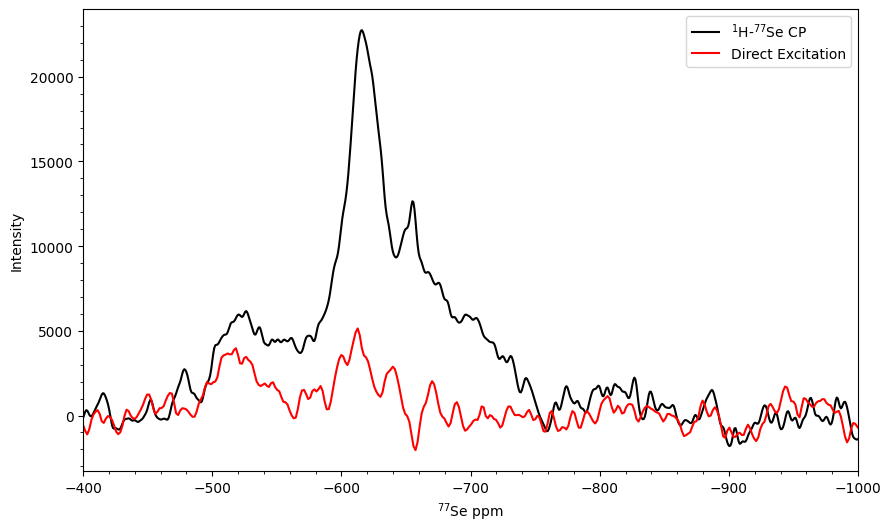

In [11]:
#se NMR data prepare
#se cp ( 317, ns=2k

#Dp(318, ns=2k)
bas_dir=os.path.dirname('/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Yunyao')
path1_list = ['Yunyao','317','pdata','1']
data_path1 = os.path.join(bas_dir, *path1_list)
path2_list = ['Yunyao','318','pdata','1']
data_path2 = os.path.join(bas_dir, *path2_list)
#print(data_path)

dic1, data1=ng.bruker.read_pdata(data_path1)
dic2, data2=ng.bruker.read_pdata(data_path2)
udic1=ng.bruker.guess_udic(dic1,data1)
uc1=ng.fileiobase.uc_from_udic(udic1)
ppm1=uc1.ppm_scale()
udic2=ng.bruker.guess_udic(dic2,data2)
uc2=ng.fileiobase.uc_from_udic(udic2)
ppm2=uc2.ppm_scale()


fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(ppm1,data1,'k-',label='$^{1}$H-$^{77}$Se CP')
ax.plot(ppm2,data2,'r-',label='Direct Excitation')

ax.set_xlabel('$^{77}$Se ppm')
ax.set_ylabel("Intensity")
ax.minorticks_on()  # Enable minor ticks on both x and y axes
#ax.set_title("Top Values from Each Group")
ax.set_xlim(-400, -1000)
plt.legend()
#plt.grid(True)
plt.show()
fig.savefig('/Users/yunyao_1/Dropbox/CdSe-data-owen/Figures/Se_DPVSCP_plot.pdf')